# Принятие решений в бизнесе на основе данных

В данном проекте нам предстоит примерить на себя роль аналитика крупного интернет-магазина. У нас есть список гипотез для увеличения выручки.
Наша работа будет проходить в два этапа:
* Приоритизация гипотез
* Анализ результатов A/B-теста

<a id='content'></a>
## Оглавление

### Приоритизация гипотез 
* [Рассмотрим 9 гипотез по увеличению выручки интернет-магазина и выберем наиболее приоритетные.](#start)

### Анализ A/B-теста
* [Анализ и предподготовка данных](#part_1.1)
* [Аннализ сырых данных после произведенного теста](#part_1.2)
* [Проверка гипотезы "Распределение конверсии в группе А соответствует распределению конверсии в группе В" по сырым данным](#part_1.3)
* [Проверка гипотезы "Распределение суммы среднего чека в группе А соответствует распределению суммы среднего чека в группе В" по сырым данным](#part_1.4)
* [Проверка гипотезы "Распределение конверсии в группе А соответствует распределению конверсии в группе В" по очищенным от выбросов данным](#part_1.5)
* [Проверка гипотезы "Распределение суммы среднего чека в группе А соответствует распределению суммы среднего чека в группе В" по очищенным от выбросов данным](#part_1.6)

### Вывод
* [Сделаем общий вывод ](#finish)

## Приоритизация гипотез
[*Назад к оглавлению*](#content)

Рассмотрим 9 гипотез по увеличению выручки интернет-магазина и выберем наиболее приоритетные. <a id='start'></a>

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
print(hypothesis)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  


Применим фреймворки ICE и RICE для приоритизации гипотез.

In [4]:
hypothesis['ICE'] = np.round((hypothesis['Impact']*hypothesis['Confidence']) / hypothesis['Efforts'], 1)
hypothesis.sort_values(by='ICE', ascending=False).loc[:, ['Hypothesis', 'ICE']]

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [5]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False).loc[:, ['Hypothesis', 'RICE']]

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Можем заметить, что приоритизация гипотез изменилась - так как RICE также учатывает охват - скольких пользователей затронет изменение, которое мы хотим внести.


    
Гипотеза "Запустить акцию, дающую скидку на товар в день рождения", лидироввавшая в первый раз, спустилась на 5 место. И неудивительно, у нее очень маленький охват.
    

Стоит обратить внимание на следующие гипотезы:
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    
Они в топ-3 обеих приоритезаций.



## Анализ A/B-теста
[*Назад к оглавлению*](#content)

Мы провели A/B-тест и получили результаты, рассмотрим их. <a id='part_1.1'></a>

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Подготовим данные для работы.

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные приведены в нужный формат. Теперь поищем дубликаты.

In [11]:
orders.duplicated().sum()

0

In [12]:
orders['transactionId'].duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

Мы не обнаружили полных дубликатов и дубликатов идентификаторов заказа.

Проверим, за какие даты у нас предоставлены данные.

In [14]:
print(orders['date'].min())
print(orders['date'].max())
print(visitors['date'].min())
print(visitors['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00


Можем заметить, что и данные о заказах, и даные о пользователях представлены за один период -  август 2019 года. Отлично!


Проверим, есть ли у нас пользователи, которые попали в две группы одновременно.

In [46]:
id_a = orders.query('group == "A"')['visitorId']
len(orders.query('(group == "B") and visitorId in @id_a')['visitorId'].drop_duplicates())

58

58 пользователей попадают сразу в обе группы. Это действительно странная ошибка, такого быть не должно. Удалить их мы не можем, так как также придется удалять из визитов, что не представляется возможным. Но об этой ошибке обязательно необходимо рассказать коллегам и выясняить, в чем собственно было дело.

In [15]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Построим график кумулятивной выручки по группам. <a id='part_1.2'></a>

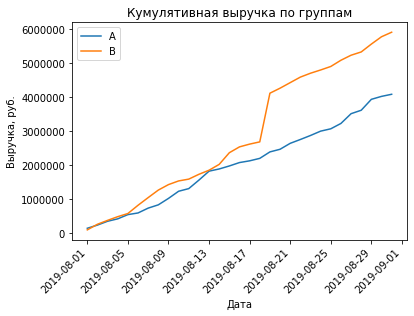

In [33]:
plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')

plt.legend()
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка, руб.")
plt.xticks(rotation=45, ha='right')
register_matplotlib_converters()

Можем заметить, что группа В почти сразу начинает опережать группу А. Чуть дальше середины наблюдения виден скачек - возможно, из-за выбросов, это будет необходимо проверить.

Построим график кумулятивного среднего чека по группам.

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

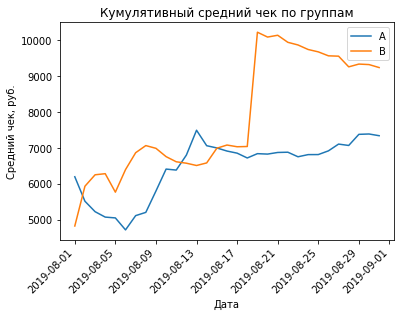

In [34]:
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')

plt.legend()
plt.title("Кумулятивный средний чек по группам")
plt.xlabel("Дата")
plt.ylabel("Средний чек, руб.")
plt.xticks(rotation=45, ha='right')

Если рассматривать средний чек - можно заметить, что в середине наблюдения группа А ненадолго вырывалась вперед. 
Также и тут заметен скачек в данных группы В. Изучим это далее.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

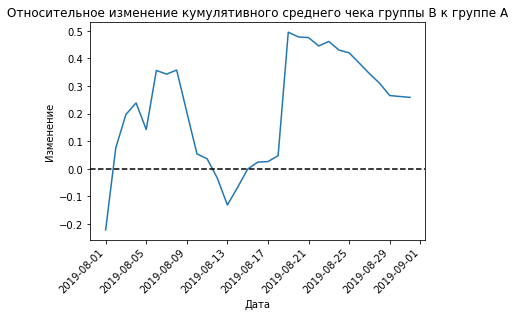

In [35]:
plt.plot(data['date'],
         (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1
        )
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Изменение")
plt.xticks(rotation=45, ha='right')

В нескольких местах график различия между сегментами резко «скачет». Необходимо будет изучить выбросы.

Построим график кумулятивной конверсии по группам.

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

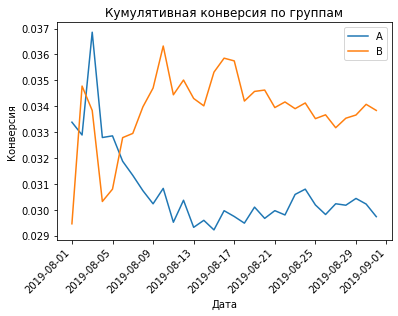

In [36]:
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], label='A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], label='B')

plt.legend()
plt.title("Кумулятивная конверсия по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.xticks(rotation=45, ha='right')

Очевидно, что группа B вырывается вперед. Обе конверсии практически стабилизировались, резких скачков не наблюдается.

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

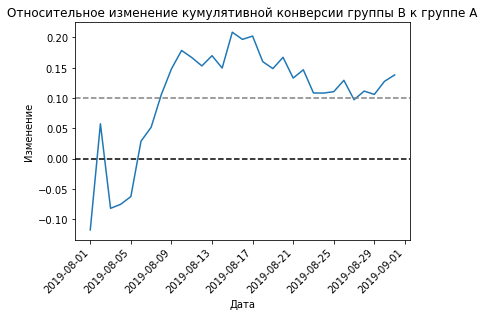

In [37]:
plt.plot(data['date'],
         (data['ordersCummulativeB']/data['visitorsCummulativeB'])/(data['ordersCummulativeA']/data['visitorsCummulativeA'])-1
        )
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title("Относительное изменение кумулятивной конверсии группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Изменение")
plt.xticks(rotation=45, ha='right')

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Слегка просела ближе к концу, но теперь снова растет. В любом случае, конверсия группы В более чем на 10% лучше группы А.

Построим точечный график количества заказов по пользователям.

Text(0, 0.5, 'Количество заказов')

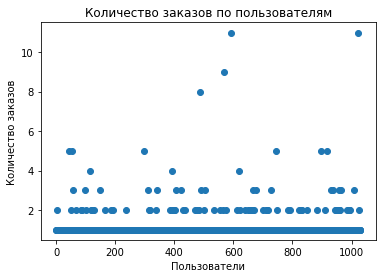

In [21]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Количество заказов по пользователям")
plt.xlabel("Пользователи")
plt.ylabel("Количество заказов")

Пользователей с 3 заказами существенно меньше, чем с двумя. Чаще всего клиенты совершают 1 заказ.
Скорее всего, все, кто совершают более 2 заказов могут считаться выбросами.

Проверим это - посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [22]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Как и предполагалось, 95% пользователей совершают 1-2 заказа. Будем считать что все значения больше - выбросы.

Рассмотрим стоимость заказов. Построим точечный график стоимостей заказов.

Text(0, 0.5, 'Сумма заказа, руб.')

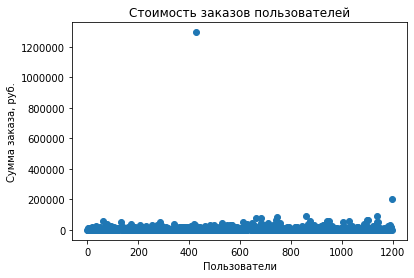

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title("Стоимость заказов пользователей")
plt.xlabel("Пользователи")
plt.ylabel("Сумма заказа, руб.")

Оказывается, у нас есть заказы более миллиона рублей! Это точно выброс.

Проверим, какие же еще заказы считать выбросами.

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

95% пользователей совершают покупки на сумму 28 000 рублей и ниже. Будем считать что все значения больше - выбросы.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

<a id='part_1.3'></a>
Сформулируем нулевую и обратные гипотезы:

Нулевая: ***Распределение конверсии в группе А соответствует распределению конверсии в группе В.***
    
Обратная: ***Распределение конверсии в группе А не соответствует распределению конверсии в группе В.***


In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

a = 0.05

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

if stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1] < a:
    print('Отвергаем нулевую теорию')
else:
    print('Не получилось отвергнуть нулевую теорию')

0.017
0.138
Отвергаем нулевую теорию


Значит, мы можем сказать, что в конверсии между группами есть статистически значимые различия.
Также можем заметить, что относительный выигрыш группы В составляет 13,8%.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

<a id='part_1.4'></a>
Сформулируем нулевую и обратные гипотезы:

Нулевая: ***Распределение суммы среднего чека в группе А соответствует распределению суммы среднего чека в группе В.***
    
Обратная: ***Распределение суммы среднего чека в группе А не соответствует распределению суммы среднего чека в группе В.***

In [26]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'],alternative='two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],
                      alternative='two-sided')[1] < a:
    print('Отвергаем нулевую теорию')
else:
    print('Не получилось отвергнуть нулевую теорию')

0.729
0.259
Не получилось отвергнуть нулевую теорию


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно больше среднего чека группы A (на 26%).

<a id='part_1.4'></a>
Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.
Для этого сначала соберем все выбросы.

In [27]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


Получаем 74 анамальных пользователя.

Теперь можем очистить данные от этих значений.

In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1] < a:
    print('Отвергаем нулевую теорию')
else:
    print('Не получилось отвергнуть нулевую теорию')

0.013
0.173
Отвергаем нулевую теорию


Вспомним нулевую и обратные гипотезы:

Нулевая: ***Распределение конверсии в группе А соответствует распределению конверсии в группе В.***
    
Обратная: ***Распределение конверсии в группе А не соответствует распределению конверсии в группе В.***

В конверсии между группами все еще сть есть статистически значимые различия, это логично.
Правда изменился относительный выигрыш группы В: теперь он составляет составляет 17,3%.

<a id='part_1.5'></a>
Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [29]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            alternative='two-sided',
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

if stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
    alternative='two-sided',
        )[1] < a:
    print('Отвергаем нулевую теорию')
else:
    print('Не получилось отвергнуть нулевую теорию')

0.738
-0.020
Не получилось отвергнуть нулевую теорию


Наши гипотезы звучали следующим образом:

Нулевая: ***Распределение суммы среднего чека в группе А соответствует распределению суммы среднего чека в группе В.***
    
Обратная: ***Распределение суммы среднего чека в группе А не соответствует распределению суммы среднего чека в группе В.***

Мы все еще не можем отвергнуть нулевую теорию - то есть статистически значемых различий между средними чеками разных групп нет.
Однако теперь средние чеки групп почти одинаковы - группа В отстает всего на 2%.

## Вывод <a id='finish'></a>
[*Назад к оглавлению*](#content)

По результатам предобработки данных была обнаружена очень серьезная ошибка:
    
58 пользователей попадают сразу в обе группы. Необходимо выяснить, в чем собственно дело.

По результатам проритизации гипотез мы выбрали две наиболее перспективные:
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   

По результатм анализа данных в результате А/В-теста мы можем сделать следующие выводы:

* Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A и конверсия практически стабилизировалась.
* Относительный выигрыш конверсии группы В по "сырым" данным составляет - 13,8%, по очищенным - 17,3%.
* Относительный выигрыш среднего чека группы В по "сырым" данным составляет - 26%, по очищенным - -2%.

Можно сказать, что группа B определенно лучше конверсируется, чем группа B. Однако средний чек, хоть и больше, чем у группы А, но только благодаря выбросам - разовым нетипично большим покупкам.

В целом, мы можем остановить тест и присудить победу группе В - клиенты значительно часто стали переходить из состояния "я только посмотрю" в "я куплю", при том, что на средний чек это практически не повлияло.    

Победа группы В в данном случае скорее всего будет означать, что количество заказов должно вырасти, однако суммы заказов останутся прежними.